## Install library Beautiful Soup

In [1]:
import sys
!{sys.executable} -m pip install bs4

## Source Code Web Scrape

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from datetime import date
import datetime
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api
import statsmodels.formula.api

today = date.today()
today=date.strftime(today,'%d/%m/%Y')
urlheader = {
    "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Mobile Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}
filename=['D:\BTC_USD Bitfinex Historical Data.csv'] #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download
url = "https://www.investing.com/instruments/HistoricalDataAjax"


for each in filename:
    with open(each, 'r') as readFile:
        reader = csv.reader(readFile)
        lines = list(reader)
    startdate=lines[1][0]
    startdate=datetime.datetime.strptime(startdate,'%b %d, %Y')
    startdate += datetime.timedelta(days=1)
    startdate=startdate.strftime('%d/%m/%Y')
    readFile.close()
    if (each == 'D:\BTC_USD Bitfinex Historical Data.csv'): #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download 
        header="BTC/USD Bitfinex Historical Data"
        curr_id="945629"
        smlID= "145284"
        column_name='BTC Price'
 
    payload = {'header': header, 
               'st_date': startdate, 'end_date': today, 
               'sort_col': 'date', 'action': 'historical_data', 
               'smlID': smlID, 'sort_ord': 'DESC', 'interval_sec': 'Daily', 'curr_id': curr_id}

    req = requests.post(url, headers=urlheader, data=payload)
    soup = BeautifulSoup(req.content, "lxml")
    table = soup.find('table', id="curr_table")
    split_rows = table.find_all("tr")
    rows = table.findAll('tr')
    header_text = []
    headers = rows[0]
    
    
    for th in headers.findAll('th'):
        header_text.append(th.text)
        
    del header_text[2:]
    
    row_text_array = []
    for row in rows[1:]:
        row_text = []
        for row_element in row.findAll(['th', 'td']):
            row_text.append(row_element.text.replace('\n', '').strip())
        del row_text[2:]
        row_text_array.append(row_text)
    
    df = pd.read_csv(each)
    
    df1 = pd.DataFrame(row_text_array)
    
    df1.rename(columns={0:'Date',1:column_name}, inplace=True)
    df=df.append(df1,sort=False)
    df=df.dropna()
    df['Date']= pd.to_datetime(df['Date'])
    df = df.sort_values('Date',ascending=False)
    
    df['Date']= df['Date'].dt.strftime('%d-%b-%y')
    print(df.head(3))
    df.to_csv(each,index=False)

        Date     Price      Open      High       Low   Vol. Change %
0  12-Oct-21  56,602.0  57,468.0  57,493.0  56,443.0  7.44K   -1.51%
1  11-Oct-21  57,468.0  54,701.0  57,802.5  54,430.0  7.51K    5.06%
2  10-Oct-21  54,701.0  54,978.0  56,414.0  54,173.0  5.84K   -0.50%


## Mengetahui informasi data yang telah di-scrape

In [3]:
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,12-Oct-21,"56,602.0","57,468.0","57,493.0","56,443.0",7.44K,-1.51%
1,11-Oct-21,"57,468.0","54,701.0","57,802.5","54,430.0",7.51K,5.06%
2,10-Oct-21,"54,701.0","54,978.0","56,414.0","54,173.0",5.84K,-0.50%
3,09-Oct-21,"54,978.0","53,925.0","55,443.7","53,711.0",2.44K,1.95%


In [4]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3537,3537,3537,3537,3537,3537,3537
unique,3537,3055,3044,3003,3019,1922,1323
top,31-Jan-20,5.1,5.1,5.1,5.1,-,0.00%
freq,1,26,26,26,26,660,135


In [5]:
df.shape

(3537, 7)

In [6]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3537 non-null   object
 1   Price     3537 non-null   object
 2   Open      3537 non-null   object
 3   High      3537 non-null   object
 4   Low       3537 non-null   object
 5   Vol.      3537 non-null   object
 6   Change %  3537 non-null   object
dtypes: object(7)
memory usage: 221.1+ KB


### Mining beberapa kolom yang dibutuhkan untuk analisa data sekaligus mengetahui informasi setelah dilakukan mining

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

In [9]:
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-10-12,56602.0,57468.0,57493.0,56443.0,7.44K,-1.51%
1,2021-10-11,57468.0,54701.0,57802.5,54430.0,7.51K,5.06%
2,2021-10-10,54701.0,54978.0,56414.0,54173.0,5.84K,-0.50%
3,2021-10-09,54978.0,53925.0,55443.7,53711.0,2.44K,1.95%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3537 non-null   datetime64[ns]
 1   Price     3537 non-null   float64       
 2   Open      3537 non-null   float64       
 3   High      3537 non-null   float64       
 4   Low       3537 non-null   float64       
 5   Vol.      3537 non-null   object        
 6   Change %  3537 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 221.1+ KB


In [11]:
df.describe()

,Price,Open,High,Low
count,3537.000000,3537.000000,3537.000000,3537.000000
mean,6882.641165,6867.310913,7060.097653,6666.455160
std,12351.245934,12323.964251,12664.668783,11974.408705
min,4.200000,4.200000,4.200000,4.200000
25%,273.300000,273.300000,279.600000,267.300000
50%,872.600000,871.400000,901.500000,833.700000
75%,8230.100000,8230.000000,8423.500000,8019.700000
max,63518.000000,63518.000000,64374.000000,62348.000000


### Olah Data

In [12]:
avgp = df.groupby('Date')['Price'].mean()

In [13]:
x = avgp.index
y = avgp.values

Text(0.5, 1.0, 'Pergerakan Harga Bitcoin')

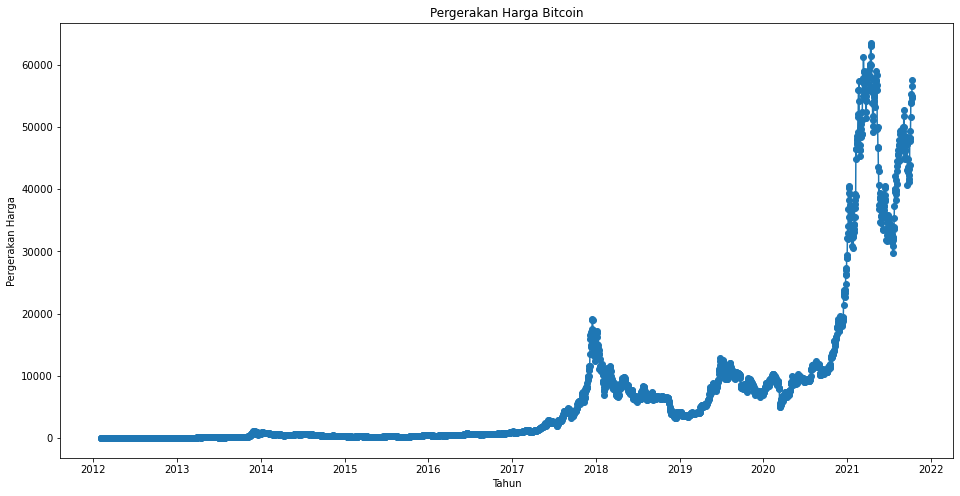

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Tahun')
plt.ylabel('Pergerakan Harga')
plt.title('Pergerakan Harga Bitcoin')

In [15]:
linreg = LinearRegression()
x=np.array(x).reshape(-1,1)
linreg.fit(x,y)

LinearRegression()

In [16]:
P_2021 = np.array(2021).reshape(-1,1)
pred_P = linreg.predict(P_2021)

In [17]:
print('Prediksi rata-rata harga tahun 2021 = ', pred_P.item())

Prediksi rata-rata harga tahun 2021 =  -134180.54578409265


In [18]:
regB = statsmodels.formula.api.ols('Price~High+Open', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.904e+06
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:32:26   Log-Likelihood:                -25992.
No. Observations:                3537   AIC:                         5.199e+04
Df Residuals:                    3534   BIC:                         5.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7297      7.242      0.101      0.9